In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zlib
import json
import base64
# rootDir = ".\\AppData\\Local\\dash_early_access\\global_levels\\"
rootDir = "/Users/victorjupin/kode/DASHGAN_orig/dash_early_access/global_levels/"

In [50]:
levels = os.walk(rootDir)
levels = levels.__next__()[2]

#for d in tmp:
#    print(rootDir + d)
from sklearn.cluster import DBSCAN
def parseLevel2(blob, n=32, m=3):
    lvlArr = np.zeros((m,n,n),dtype=np.int)
#     xmin = int(x0 - n/2)
#     xmax = int(x0 + n/2)
#     ymin = int(y0 - n/2)
#     ymax = int(y0 + n/2)
    tileList = [];
    for element in blob.decode().split('<sep_json>'):
        if len(element) == 0:
            continue
        if len(element) > 550:
            print(element)
            continue
#         print(len(element))

        tmp = json.loads(element)
        tileList.append({'x': tmp['x'], 'y': tmp['y'], 'tile': tmp['tileNum']})
#         print(tmp['x']/32," ", tmp['y']/32)
#         for i in range(m):
#             if tmp['x'] in range(xmin * 32 + i, xmax * 32 + i) and tmp['y'] in range(ymin * 32, ymax * 32):
#                 lvlArr[i,int(tmp['x']/32-xmin - i), int(tmp['y']/32 - ymin)] = int(tmp['tileNum'])
#             print("hit! ", tmp['tileType'])
#     lvlArr = np.delete(lvlArr, np.nonzero(np.count_nonzero(lvlArr, axis=(1, 2)) < 20), axis=0)
#     lvlArr[lvlArr == 44] = 12
#     lvlArr[lvlArr > 6] -= 1
    tiles_xy = np.vstack((np.array([tile['x'] for tile in tileList]),np.array([tile['y'] for tile in tileList])))/ 32
    return tiles_xy
def parseLevel(blob, x0=16, y0=16, n=32, m=3):
    lvlArr = np.zeros((m,n,n),dtype=np.int)
    xmin = int(x0 - n/2)
    xmax = int(x0 + n/2)
    ymin = int(y0 - n/2)
    ymax = int(y0 + n/2)
    for element in blob.decode().split('<sep_json>'):
        if len(element) == 0:
            continue
        if len(element) > 550:
            print(element)
            continue
#         print(len(element))

        tmp = json.loads(element)
#         print(tmp['x']/32," ", tmp['y']/32)
        for i in range(m):
            if tmp['x'] in range(xmin * 32 + i, xmax * 32 + i) and tmp['y'] in range(ymin * 32, ymax * 32):
                lvlArr[i,int(tmp['x']/32-xmin - i), int(tmp['y']/32 - ymin)] = int(tmp['tileNum']) + 1
#             print("hit! ", tmp['tileType'])
    lvlArr = np.delete(lvlArr, np.nonzero(np.count_nonzero(lvlArr, axis=(1, 2)) < 20), axis=0)
    lvlArr[lvlArr == 45] = 13
    lvlArr[lvlArr > 7] -= 1
    return lvlArr

3   /Users/victorjupin/kode/DASHGAN_orig/dash_early_access/global_levels/bullet jump gap.sav
[[ 7.  7.  7.  9. 10. 11. 13. 13. 13. 12. 11. 10.  9.  8.  8.  8.  9. 10.
  11. 12. 12. 11. 10.  9.  0.  1.  2.  2.  1.  0. 20. 19. 18. 18. 19. 20.
  14.  6.  7. 13. 10.  9. 11. 19.  1.]
 [27. 26. 25. 24. 24. 24. 25. 26. 27. 27. 27. 27. 27. 27. 26. 25. 25. 25.
  25. 25. 26. 26. 26. 26. 20. 20. 20. 21. 21. 21. 21. 21. 21. 20. 20. 20.
  25. 25. 24. 24. 23. 23. 23. 20. 19.]]


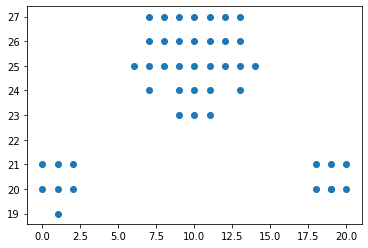

In [92]:
idxLevel = 3
for i, level in enumerate(levels):
    if i < idxLevel:
        continue
    if i > idxLevel:
        break
    filename = rootDir + level
    print(i, " ", filename)
    with open(filename, "rb") as f:
        bytes_read = f.read()
    tmp = base64.b64decode(bytes_read)

    blob = zlib.decompress(tmp)
#     print(blob)
    lvlArr = np.zeros((100,100),dtype=np.uint)
    X = parseLevel2(blob, m = 32)
    print(X)
# plt.spy(X[0,:,:])
# plt.show()
# plt.spy(X[1,:,:])
# plt.show()
plt.scatter(X[0,:],X[1,:])
plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XX = ss.fit_transform(X.T)
db = DBSCAN().fit(XX)
print(db.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 0
 0 0 0 0 0 0 2 1]


In [107]:
ss.scale_

array([5.33333333, 2.54636027])

In [57]:
import torch
# import torchvision

# An instance of your model.
# model = torchvision.models.resnet18()

# An example input you would normally provide to your model's forward() method.
# example = torch.rand(1, 3, 224, 224)

# # Use torch.jit.trace to generate a torch.jit.ScriptModule via tracing.
# traced_script_module = torch.jit.trace(model, example)

# # Save the model
# traced_script_module.save("model-resnet18-jit.pt")

G = torch.jit.load('/Users/victorjupin/kode/DASHGAN_orig/netG_epoch_99.pt')

In [71]:
fake = G(torch.FloatTensor(np.random.randn(32).reshape((1,32,1,1))))

In [72]:
print(fake.data.shape)

torch.Size([1, 12, 32, 32])
